In [51]:
# imports 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score, mean_squared_error, confusion_matrix, classification_report
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [52]:
data = pd.read_csv('C:\\Users\\etiem\\Downloads\\churn_data.csv')
data.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [53]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
data.head()

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,1,46,US,iOS,756.005761,39,2,582.023075,92,2,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,2,52,US,iOS,594.838157,59,0,251.269898,33,2,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,3,43,Canada,Android,453.217405,21,3,124.178946,92,0,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,4,41,US,iOS,621.453170,95,1,134.362559,46,5,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,5,41,US,iOS,660.735119,48,5,713.265527,54,2,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              10000 non-null  int64  
 1   Age                     10000 non-null  int64  
 2   Location                10000 non-null  object 
 3   Device                  10000 non-null  object 
 4   Month_1_Spend           10000 non-null  float64
 5   Month_1_Items           10000 non-null  int64  
 6   Month_1_Support_Calls   10000 non-null  int64  
 7   Month_2_Spend           10000 non-null  float64
 8   Month_2_Items           10000 non-null  int64  
 9   Month_2_Support_Calls   10000 non-null  int64  
 10  Month_3_Spend           10000 non-null  float64
 11  Month_3_Items           10000 non-null  int64  
 12  Month_3_Support_Calls   10000 non-null  int64  
 13  Month_4_Spend           10000 non-null  float64
 14  Month_4_Items           10000 non-null 

In [55]:
# Checking for more nulls
data.isnull().sum()

CustomerID                0
Age                       0
Location                  0
Device                    0
Month_1_Spend             0
Month_1_Items             0
Month_1_Support_Calls     0
Month_2_Spend             0
Month_2_Items             0
Month_2_Support_Calls     0
Month_3_Spend             0
Month_3_Items             0
Month_3_Support_Calls     0
Month_4_Spend             0
Month_4_Items             0
Month_4_Support_Calls     0
Month_5_Spend             0
Month_5_Items             0
Month_5_Support_Calls     0
Month_6_Spend             0
Month_6_Items             0
Month_6_Support_Calls     0
Month_7_Spend             0
Month_7_Items             0
Month_7_Support_Calls     0
Month_8_Spend             0
Month_8_Items             0
Month_8_Support_Calls     0
Month_9_Spend             0
Month_9_Items             0
Month_9_Support_Calls     0
Month_10_Spend            0
Month_10_Items            0
Month_10_Support_Calls    0
Month_11_Spend            0
Month_11_Items      

In [56]:
data.describe()

,CustomerID,Age,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,Month_3_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,42.698500,482.593336,64.657700,2.488800,476.297118,63.118000,2.517400,481.965314,62.871600,...,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,2886.89568,12.495528,237.961476,29.329527,1.711306,237.491820,28.933247,1.703639,235.535388,28.373477,...,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,1.00000,20.000000,45.147050,12.000000,0.000000,46.283232,12.000000,0.000000,45.792390,12.000000,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,2500.75000,32.000000,275.978779,39.000000,1.000000,268.427326,38.000000,1.000000,283.141582,38.000000,...,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,5000.50000,43.000000,482.173250,65.000000,2.000000,474.442784,63.000000,3.000000,480.440066,62.000000,...,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,7500.25000,53.000000,688.898992,90.000000,4.000000,680.824377,88.000000,4.000000,684.508894,87.000000,...,680.923305,80.000000,4.000000,673.599392,78.000000,4.000000,681.397961,77.000000,4.000000,1.00000
max,10000.00000,65.000000,889.597940,115.000000,5.000000,889.712540,113.000000,5.000000,889.756303,113.000000,...,889.979951,113.000000,5.000000,889.998913,113.000000,5.000000,889.612221,113.000000,5.000000,1.00000


In [57]:
correlation_matrix = data[['Age', 'Month_1_Spend', 'Month_1_Items', 'Month_1_support_Calls, Month_2_Spend, ']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Analysis of Engagement Metrics")
plt.show()

KeyError: "['Month_1_support_Calls, Month_2_Spend, '] not in index"

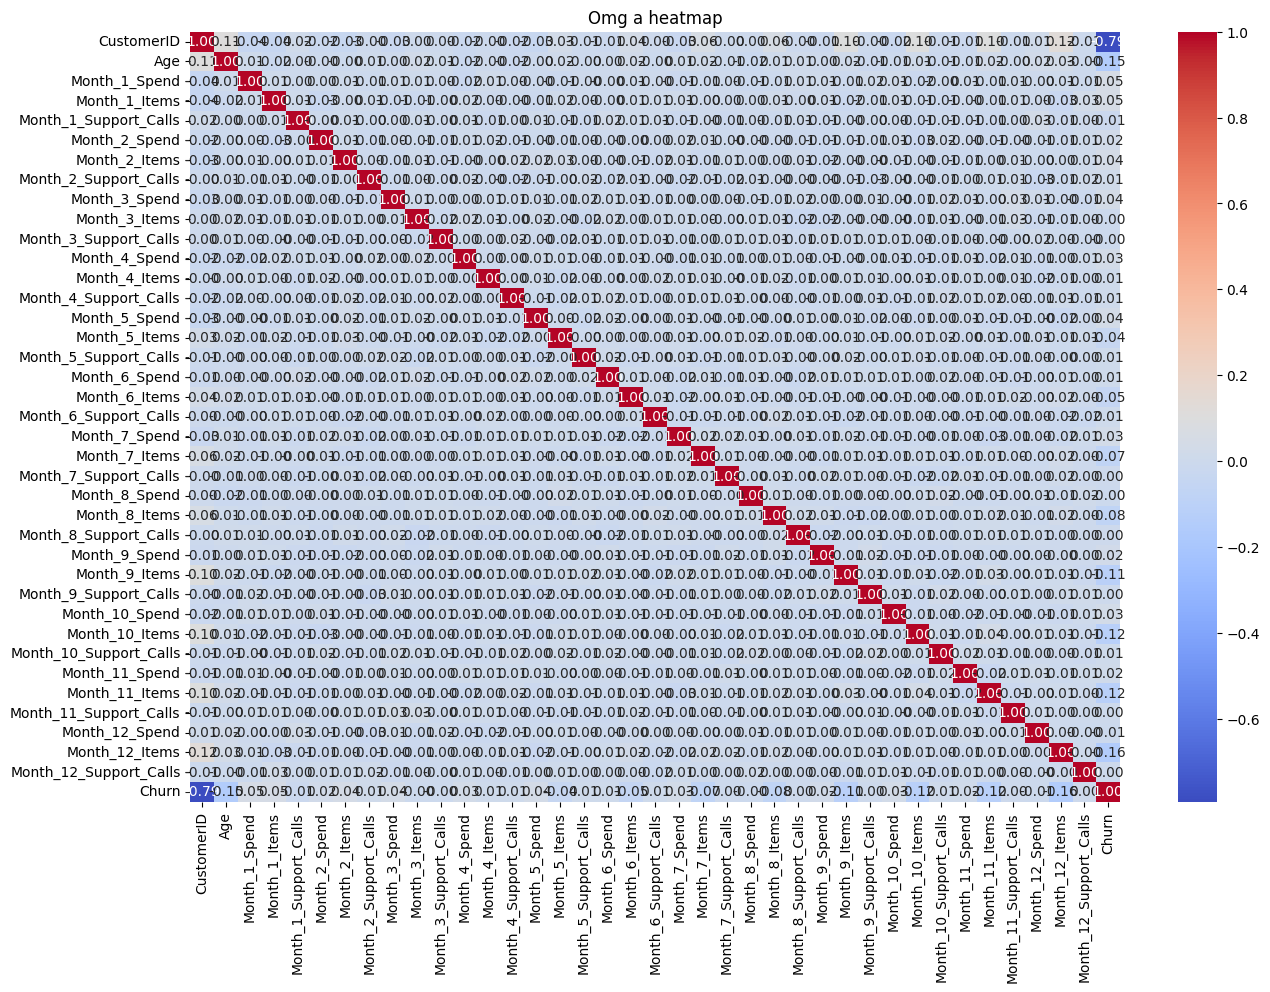

In [18]:
# Select only the numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Generate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Omg a heatmap")
plt.show()

## EDA

<function matplotlib.pyplot.show(close=None, block=None)>

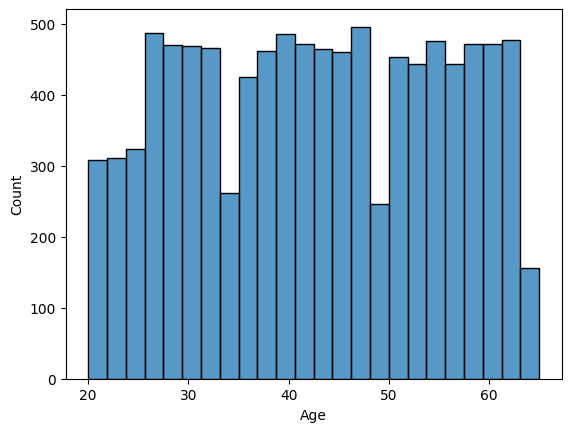

In [58]:
sns.histplot(x=data['Age'])
plt.show

<Axes: xlabel='Location', ylabel='CustomerID'>

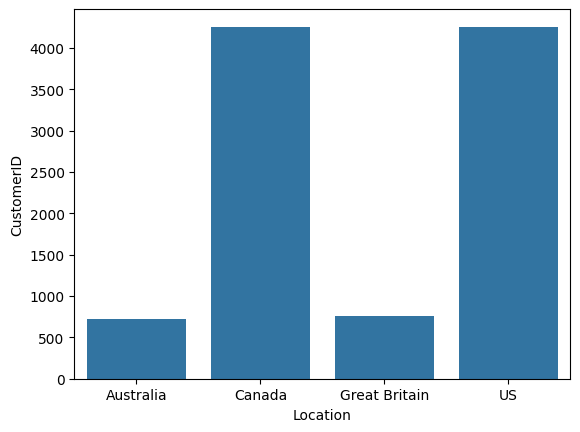

In [59]:
loc= data.groupby('Location')
sns.barplot(x=loc['CustomerID'].count().index, y=loc['CustomerID'].count())

<Axes: xlabel='Device', ylabel='CustomerID'>

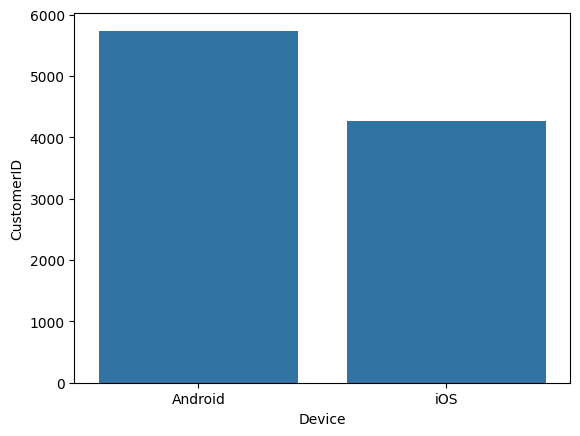

In [60]:
loc= data.groupby('Device')
sns.barplot(x=loc['CustomerID'].count().index, y=loc['CustomerID'].count())

<Axes: ylabel='Month_10_Spend'>

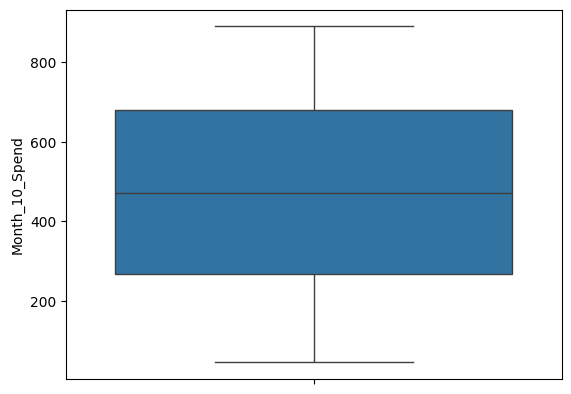

In [29]:
# univariate of month 10 spend

sns.boxplot(y=data['Month_10_Spend'])

<function matplotlib.pyplot.show(close=None, block=None)>

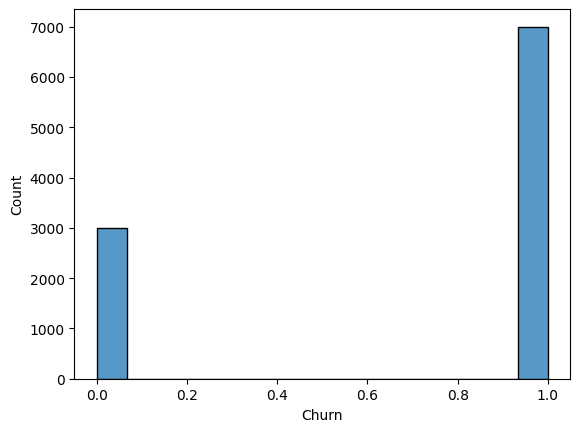

In [61]:
sns.histplot(x=data['Churn'])
plt.show

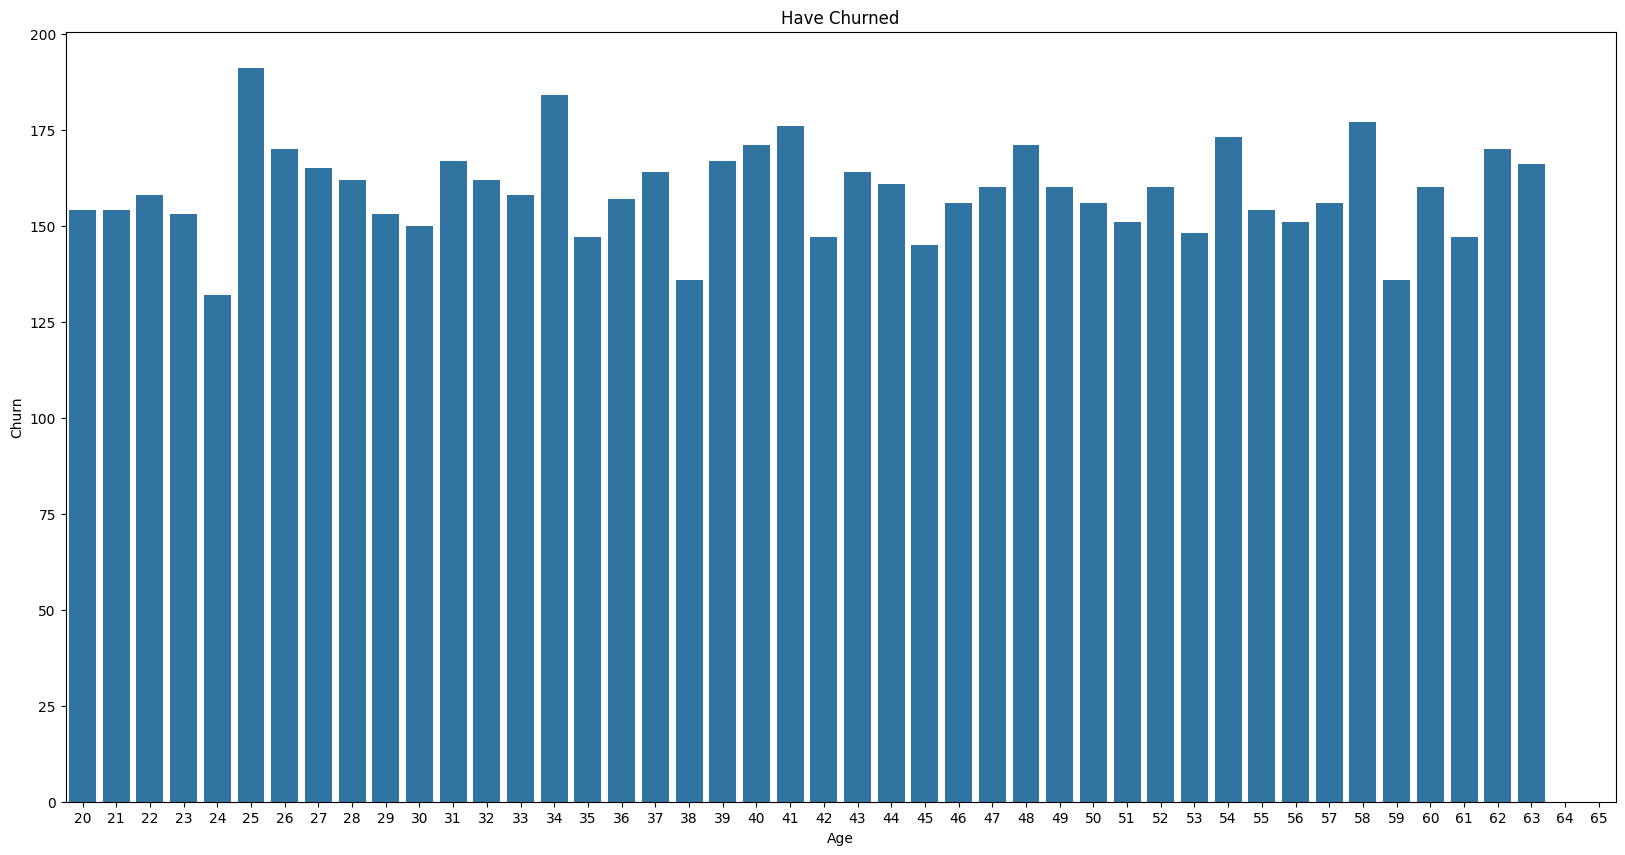

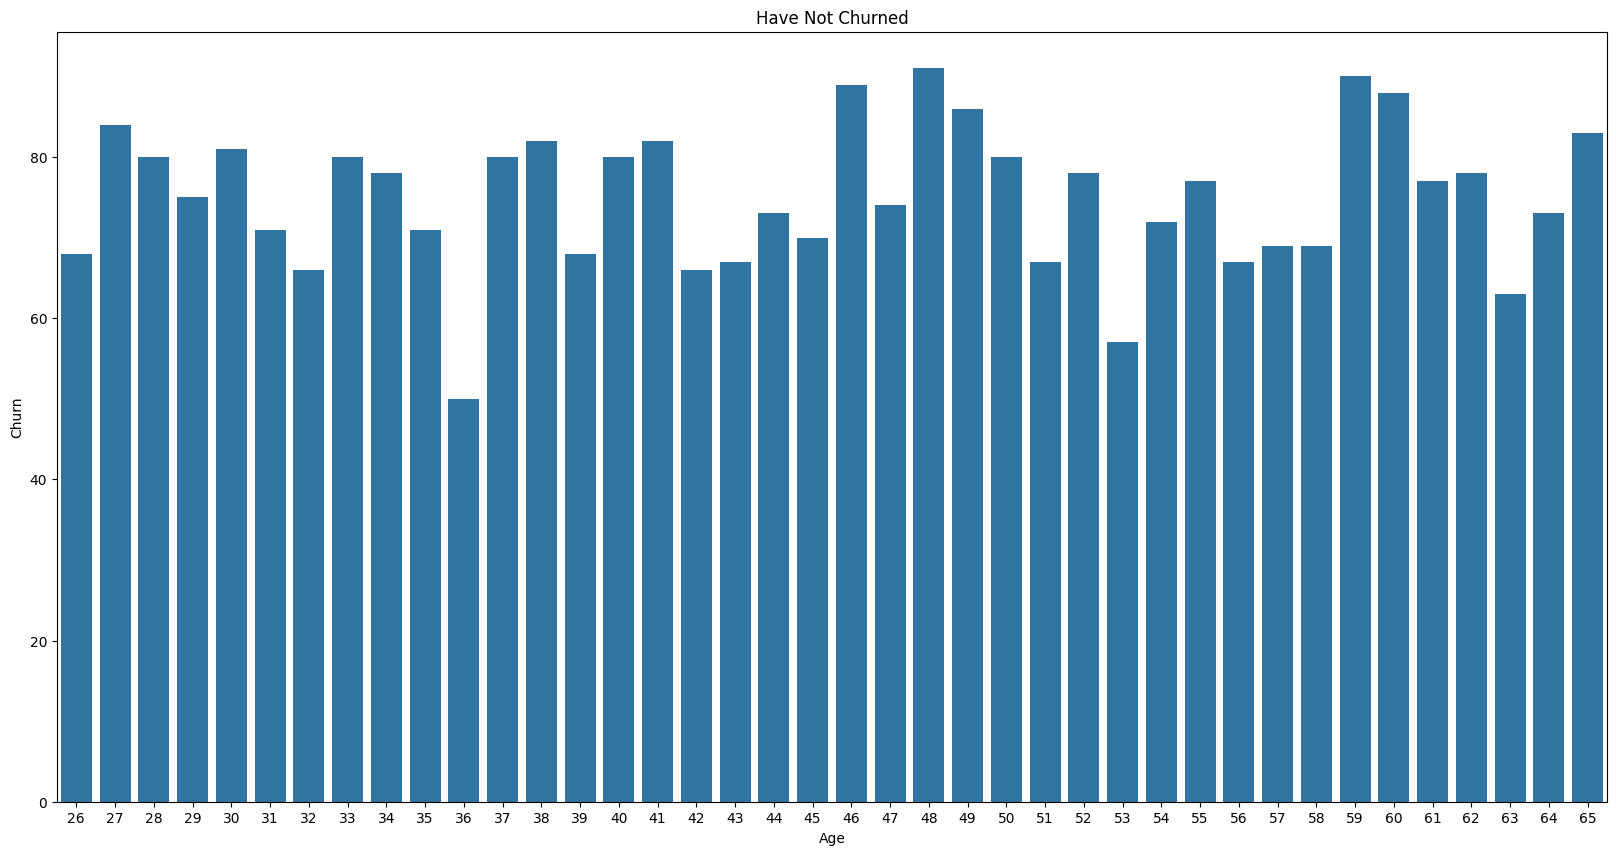

In [63]:
# group by age
ages = data.groupby('Age')

# generate bar plot for how many customers have churned per age
# Note: Using count instead of sum would be incorrect, count will just return the number of people at that age
# Assuming has churned is represented as 1, then the sum of the churn column represents how many customers have churned at that age
plt.figure(figsize=(20,10))
sns.barplot(x=ages['Churn'].sum().index, y=ages['Churn'].sum())
plt.title("Have Churned")
plt.show()

# check for people who have not churned
noChurn = data[data['Churn'] == 0]
noChurnAge = noChurn.groupby('Age')
# using count here since sum of all who have not churned would be 0
plt.figure(figsize=(20,10))
sns.barplot(x=noChurnAge['Churn'].count().index, y=noChurnAge['Churn'].count())
plt.title("Have Not Churned")
plt.show()



In [64]:
# verify no one aged 64 and 65 churned
data[(data['Age']==65) & (data['Churn']==1)]

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn


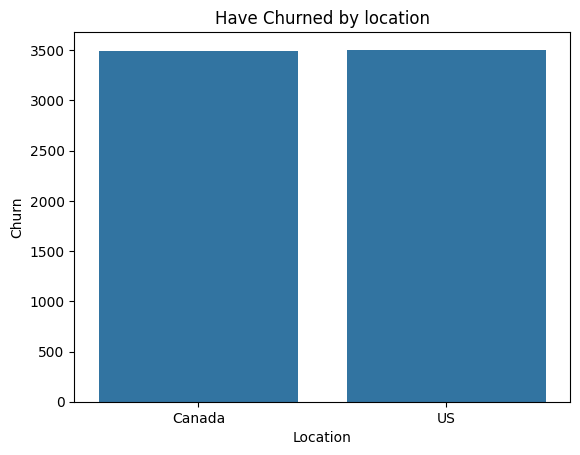

C:\Users\etiem\AppData\Local\Temp\ipykernel_23872\951845832.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc['Churn'].count().index, y=loc['Churn'].count(), palette='tab10')


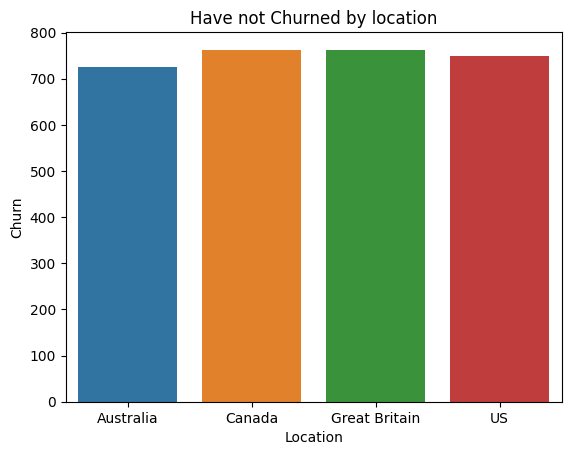

In [68]:
# multivariaate analysis of location vs churn


churn = data[data['Churn']==1]
loc = churn.groupby('Location')
sns.barplot(x=loc['Churn'].count().index, y=loc['Churn'].count())
plt.title('Have Churned by location')
plt.show()

nochurn = data[data['Churn']==0]
loc = nochurn.groupby('Location')
sns.barplot(x=loc['Churn'].count().index, y=loc['Churn'].count(), palette='tab10')
plt.title('Have not Churned by location')
plt.show()

# all customers who have churned have been located in North America (CAN and USA)
# location definitely has a relation to churn

C:\Users\etiem\AppData\Local\Temp\ipykernel_23872\2939822581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc['Churn'].count().index, y=loc['Churn'].count(), palette='tab10')


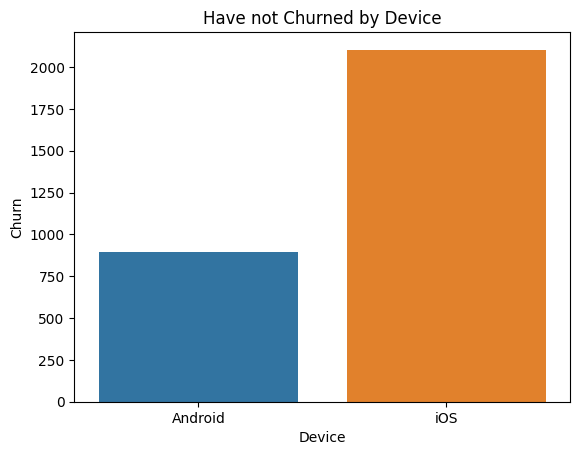

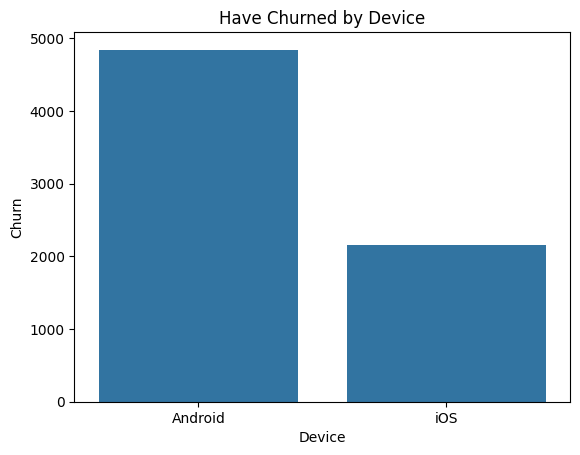

In [73]:
churn = data[data['Churn']==0]
loc = churn.groupby('Device')
sns.barplot(x=loc['Churn'].count().index, y=loc['Churn'].count(), palette='tab10')
plt.title('Have not Churned by Device')
plt.show()



churn = data[data['Churn']==1]
loc = churn.groupby('Device')
sns.barplot(x=loc['Churn'].count().index, y=loc['Churn'].count())
plt.title('Have Churned by Device')
plt.show()

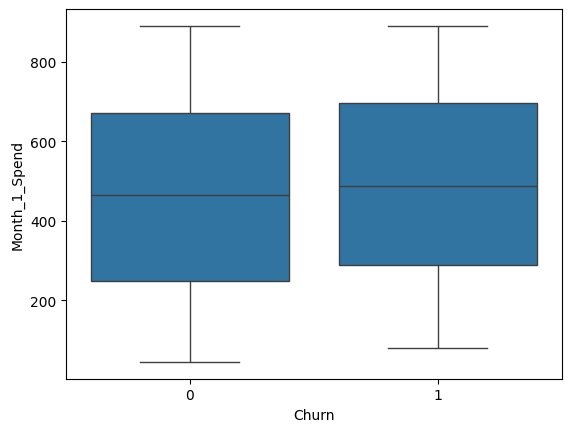

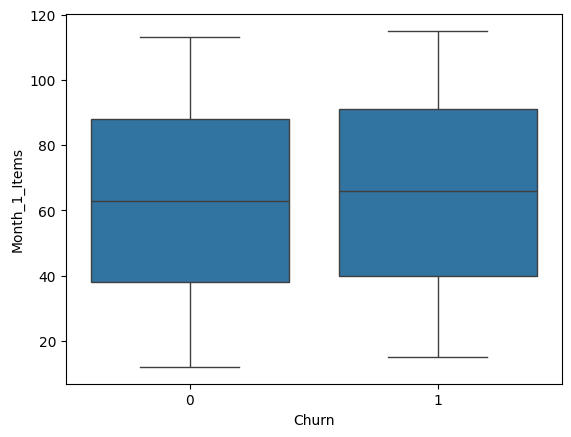

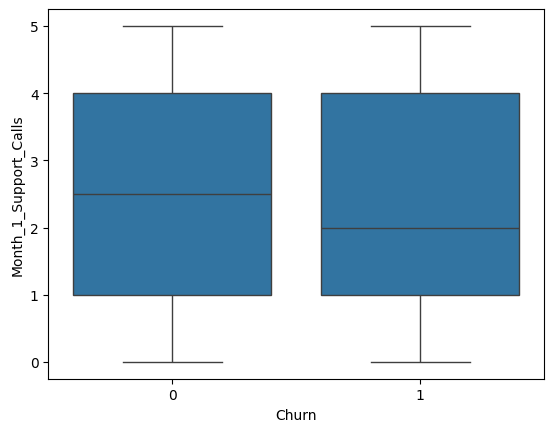

In [81]:
sns.boxplot(x= 'Churn', y='Month_1_Spend', data=data)
plt.show()
sns.boxplot(x= 'Churn', y= 'Month_1_Items', data=data)
plt.show()
sns.boxplot(x='Churn', y= 'Month_1_Support_Calls', data=data)
plt.show()

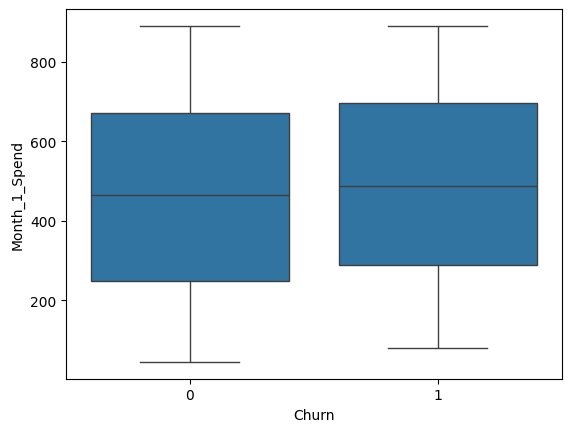

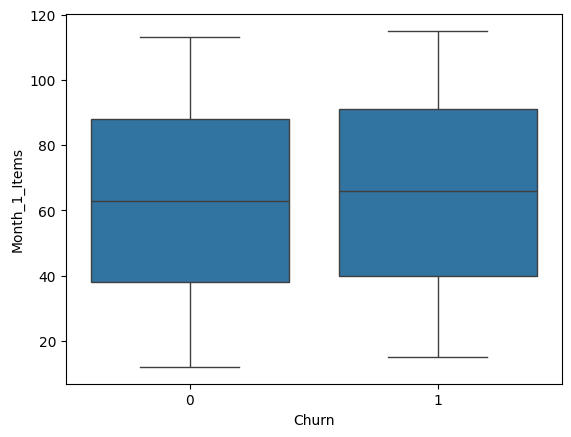

In [85]:
sns.boxplot(x='Churn', y='Month_1_Spend', data=data)
plt.show()
sns.boxplot(x='Churn', y='Month_1_Items', data=data)
plt.show()

In [ ]:
data['Q1_Spend'] = (data['Month_1_Spend'] + data['Month_2_Spend'], + data['Month_3_Spend']) / 3
data['Q1_Items'] = (data['Month_1_Items'] + data['Month_2_Items'], + data['Month_3_Items']) / 3
data['Q1_Support_Calls'] = (data['Month_1_Support_Calls'] + data['Month_2_Support_Calls'], + data['Month_3_Support_Calls']) / 3

data['Q2_Spend'] = (data['Month_4_Spend'] + data['Month_5_Spend'], + data['Month_6_Spend']) / 3
data['Q2_Items'] = (data['Month_4_Items'] + data['Month_5_Items'], + data['Month_6_Items']) / 3
data['Q2_Support_Calls'] = (data['Month_4_Support_Calls'] + data['Month_5_Support_Calls'], + data['Month_6_Support_Calls']) / 3

data['Q3_Spend'] = (data['Month_7_Spend'] + data['Month_8_Spend'], + data['Month_9_Spend']) / 3
data['Q3_Items'] = (data['Month_7_Items'] + data['Month_8_Items'], + data['Month_9_Items']) / 3
data['Q3_Support_Calls'] = (data['Month_7_Support_Calls'] + data['Month_8_Support_Calls'], + data['Month_9_Support_Calls']) / 3

data['Q4_Spend'] = (data['Month_10_Spend'] + data['Month_11_Spend'], + data['Month_12_Spend']) / 3
data['Q4_Items'] = (data['Month_10_Items'] + data['Month_11_Items'], + data['Month_12_Items']) / 3
data['Q4_Support_Calls'] = (data['Month_10_Support_Calls'] + data['Month_11_Support_Calls'], + data['Month_12_Support_Calls']) / 3

# random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def build_random_forest_model(file_path, target_column, drop_columns=[]):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Define features and target
    X = data.drop(columns=drop_columns + [target_column])
    y = data[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Identify numerical and categorical features
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    # Create a pipeline with the preprocessor and Random Forest classifier
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

    # Plot the ROC curve
    from sklearn.metrics import roc_curve

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Usage example (replace with your file path and target column)
file_path = 'path_to_your_dataset.csv'
target_column = 'target'
drop_columns = ['column_to_drop_1', 'column_to_drop_2']  # Add any columns you want to drop

build_random_forest_model(file_path, target_column, drop_columns)

Instructions for Use
Replace Placeholders:
file_path: Path to your dataset CSV file.
target_column: Name of the target column in your dataset.
drop_columns: List of columns to drop from the dataset (if any).

Run the Function:
Call the build_random_forest_model function with the appropriate parameters.
This template should work with any dataset, as long as you provide the correct file path and column names.
